### MINIMISING CHURN BY ANALYSING FINANCIAL HABITS OF CUSTOMER

##### IMPORTING RELEVENT LIBRARIES

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

##### IMPORTING THE DATASET

In [98]:
df=pd.read_csv("/home/ishu/Desktop/PROJECT 1 MINIMISING CHURN BY FINANCIAL HABITS/DATASET/churn_data.csv")

##### EXPLORATORY DATA ANALYSIS

In [3]:
df.head(3)  # PRINTING FIRST 3 ROWS OF DATA

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0


In [4]:
df.shape # tells number of rows & columns

(27000, 31)

In [5]:
df.columns # Printing list of all column names

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [6]:
df.info() 
# The summary includes list of all columns with their data types and the number of non-null values in each column.
# We also have the value of rangeindex provided for the index axis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [7]:
df.describe()
# shows count , mean, standard deviation,min value,max value,quartiles
# shows descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


##### DATA CLEANING

Checking if any column has null values.

In [8]:
df.isna().any() 

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

We have null values in column "age" , "credit_score", "rewards_earned"

In [9]:
# checking the count of all the null values in each column.

df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

Since the number of null values are very large in columns "credit_score", "rewards_earned" i.e 8031 & 3227 compared to 27000 total row values we will remove these columns.

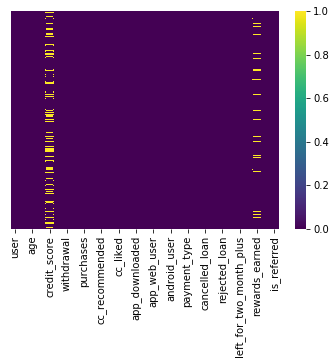

In [10]:
# Another way to check the null values throgh heatmap
# Useful in large datsets
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [11]:
df= df.drop(columns = ["credit_score", "rewards_earned"])

In [12]:
df.columns # shows all the existing columns in the data

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

As we can see in the columns list we have removed the "credit_score", "rewards_earned" columns.

Only age columns with 4 null value is left which is very less compared to 27000 rows so we will remove that also.(Here we are not filling the age value due to very less number of null value)

In [13]:
df=df.dropna(subset= ["age"]) # this dropped the null values in age column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

We can conclude from above inforamtion that now there are no null values in our data

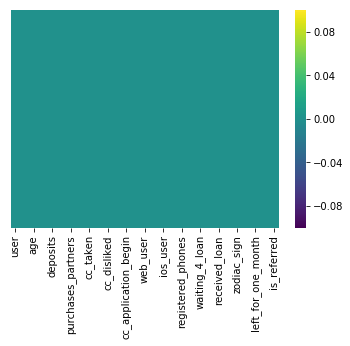

In [15]:
# checking null values using heatmap

sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

We can conclude from above plot that now there are no null values in our data

In [16]:
df["churn"].value_counts()

0    15822
1    11174
Name: churn, dtype: int64

In [17]:
Percentage_Churn=df.churn.value_counts() / len(df.churn)*100
Percentage_Churn

0    58.608683
1    41.391317
Name: churn, dtype: float64

Text(0.5,1,'Non-Churned VS Churned')

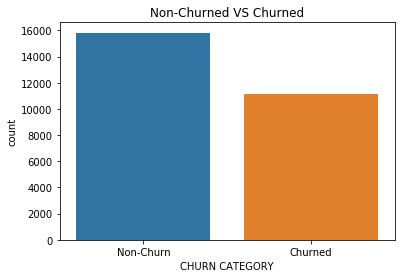

In [18]:
Age=sns.countplot(x="churn",data=df)
Age.set_xticklabels(["Non-Churn","Churned"])
Age.set_xlabel("CHURN CATEGORY")
plt.title("Non-Churned VS Churned")


"age" column contains int values but its dtype is float so converting it to int

In [19]:
df["age"]=df["age"].astype(np.int64)
df["age"].head(2)

0    37
1    28
Name: age, dtype: int64

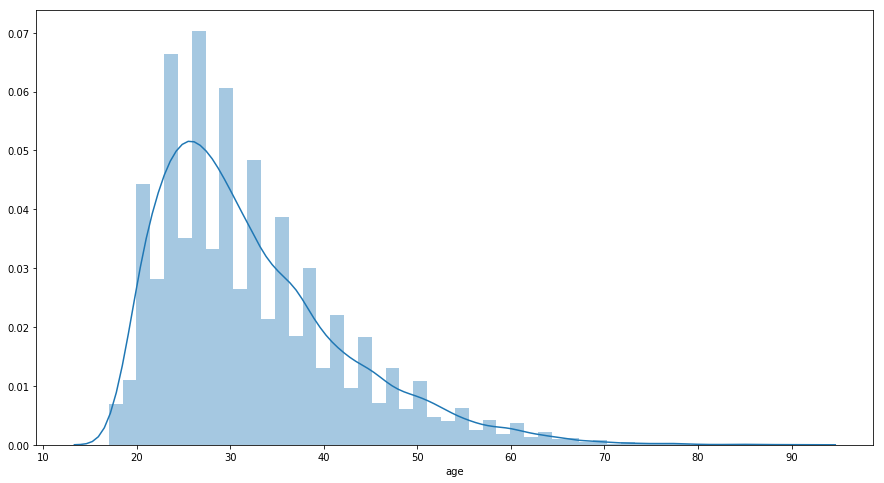

In [94]:
plt.figure(figsize=(15,8))
sns.distplot(df["age"])

Here we can see a right skewed distribution.  
Most of the customers using the product falls in age interval of 20-50

In [21]:
df['housing'].value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

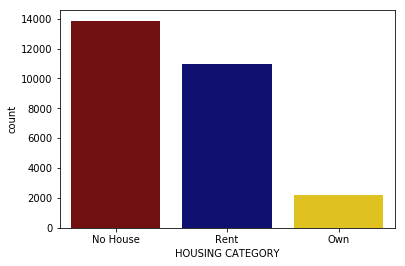

In [99]:
colors = ["maroon", "navy", "gold"]
housing=sns.countplot(x='housing',data=df,palette=colors)
housing.set_xticklabels(["No House","Rent","Own"])   
housing.set_xlabel("HOUSING CATEGORY")
plt.show()

Here we can see that maximum customers that use the product either live on rent or dont own a house.      
13856 customers dont own a house.  
10969 customers live on rent.  
2171  custoemrs own a house.

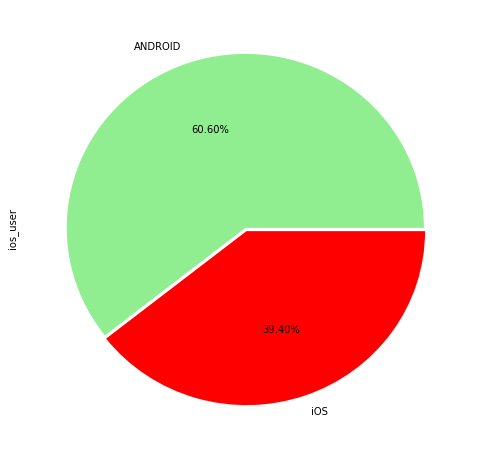

In [23]:
plt.figure(figsize=(8,8))
ios_user=df.ios_user.value_counts()
ios_user.plot(kind="pie",autopct='%1.2f%%',explode=(0,0.02),colors= ['lightgreen','red'],labels=["ANDROID","iOS"])

In [24]:
(df["deposits"] > 0).value_counts()

False    18152
True      8844
Name: deposits, dtype: int64

[Text(0,0,'No Deposit'), Text(0,0,'Atlest once')]

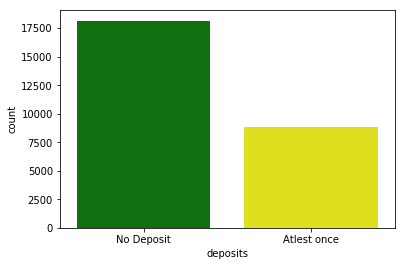

In [25]:
deposit=sns.countplot(df["deposits"] > 0,palette= ["green","yellow"])
deposit.set_xticklabels(["No Deposit","Atlest once"])

8844 customers deposited money in their bank account atleast once.  

18152 customers never deposited money in their account

In [26]:
df[(df["deposits"] > 0)].churn.value_counts()

0    6126
1    2718
Name: churn, dtype: int64

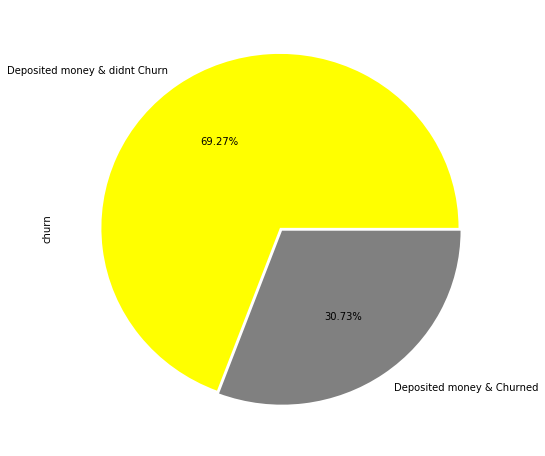

In [27]:
plt.figure(figsize=(8,8))
df[(df["deposits"] > 0)].churn.value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.02),colors=["yellow","grey"],labels=["Deposited money & didnt Churn","Deposited money & Churned"])

6126 customers who deposited money in their account atleast once didnt churn.  
  
  
2718 customers who deposited money in their account churned.

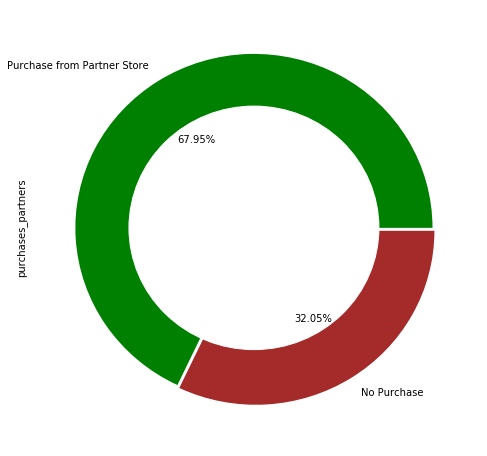

In [28]:
plt.figure(figsize=(8,8))
(df['purchases_partners']>0).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.02),colors= ['green','brown'],labels=["Purchase from Partner Store","No Purchase"])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

68% people purhcase from partner store

In [29]:
(df["purchases"] > 0).value_counts()

False    18291
True      8705
Name: purchases, dtype: int64

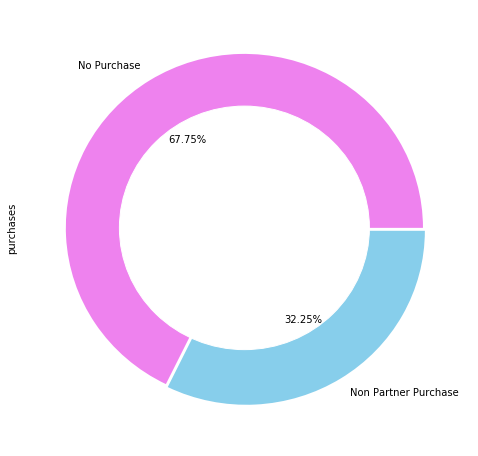

In [30]:
plt.figure(figsize=(8,8))
(df["purchases"] > 0).value_counts().plot(kind= "pie",autopct='%1.2f%%',explode=(0,0.02),colors= ['violet','skyblue'],labels=["No Purchase","Non Partner Purchase",])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Only 33% customer  buy from Non-Partner stores

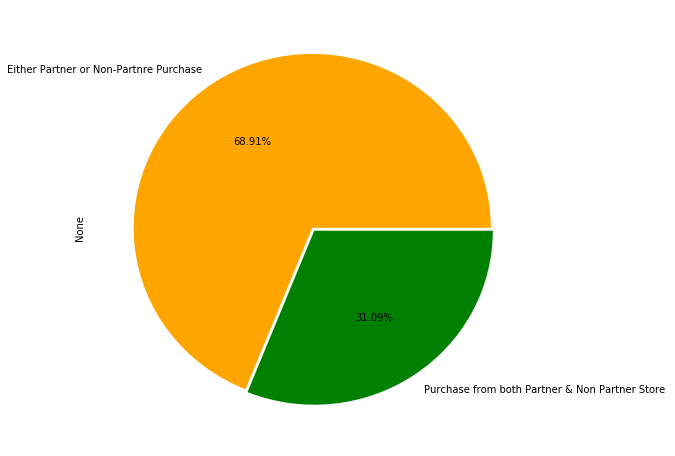

In [31]:
plt.figure(figsize=(8,8))
((df["purchases"] > 0) & (df["purchases_partners"] > 0)).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.02),colors= ['orange','green'],labels=["Either Partner or Non-Partnre Purchase","Purchase from both Partner & Non Partner Store "])

32% people buy from both Partner & Non-Partner Store

In [32]:
(df['cc_taken']>0).value_counts()

False    25701
True      1295
Name: cc_taken, dtype: int64

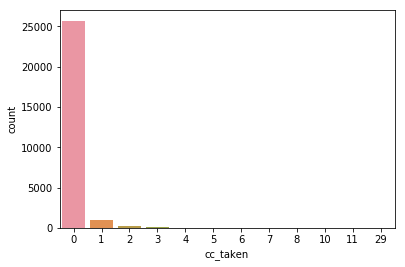

In [33]:
sns.countplot(df['cc_taken'])

Only  1295 customer use credit cards out of 26996

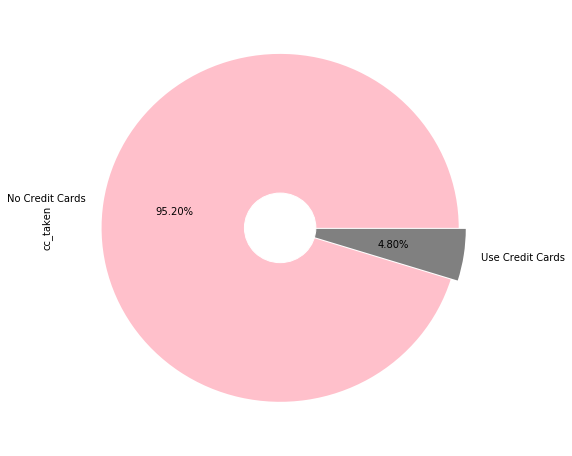

In [34]:
plt.figure(figsize=(8,8))
(df['cc_taken']>0).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.04),colors= ['pink','grey'],labels=["No Credit Cards","Use Credit Cards"])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Here we can see most ony 4.8 customers use credit card

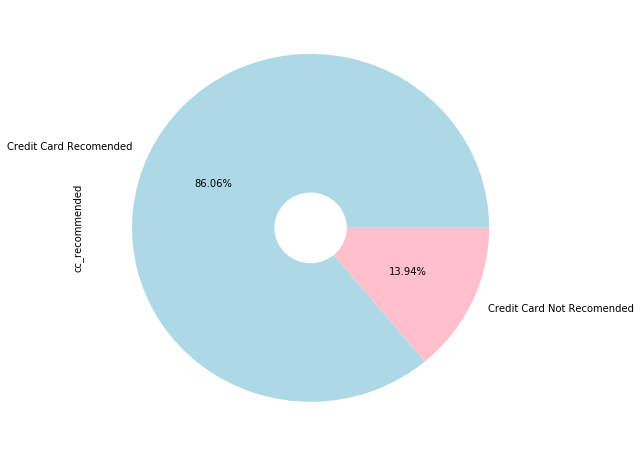

In [35]:
plt.figure(figsize=(8,8))
(df['cc_recommended'] == 0).value_counts().plot(kind="pie",autopct='%1.2f%%',colors= ['lightblue','pink'],labels=["Credit Card Recomended","Credit Card Not Recomended"])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

86% people got recommendations to take credit cards. 14 % didnt.

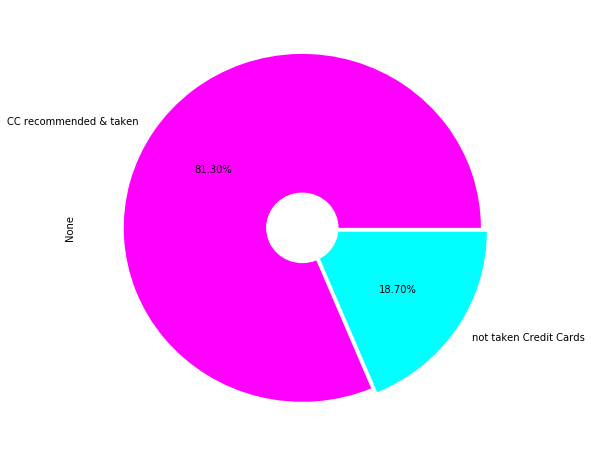

In [36]:
plt.figure(figsize=(8,8))
((df["cc_recommended"] > 0) & (df['cc_taken'] == 0)).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.04),colors= ['magenta','cyan'],labels=["CC recommended & taken","not taken Credit Cards"])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

81 % people get advertisement and only 18% taken credit card of the company

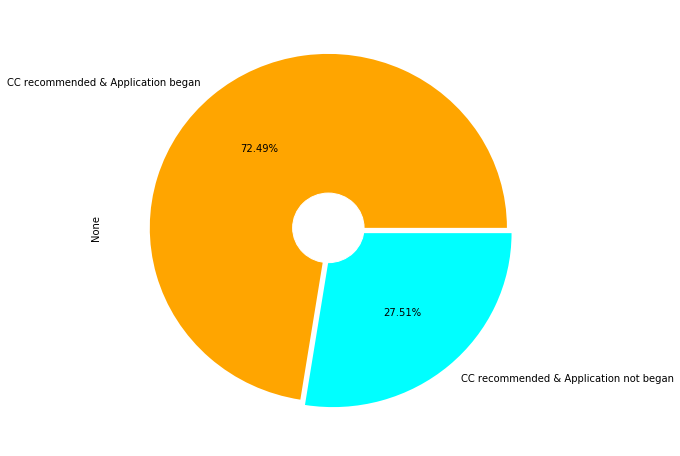

In [37]:
plt.figure(figsize=(8,8))
((df["cc_recommended"] > 0) & (df['cc_application_begin'] > 0)).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.04),colors= ['orange','cyan'],labels=["CC recommended & Application began","CC recommended & Application not began"])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

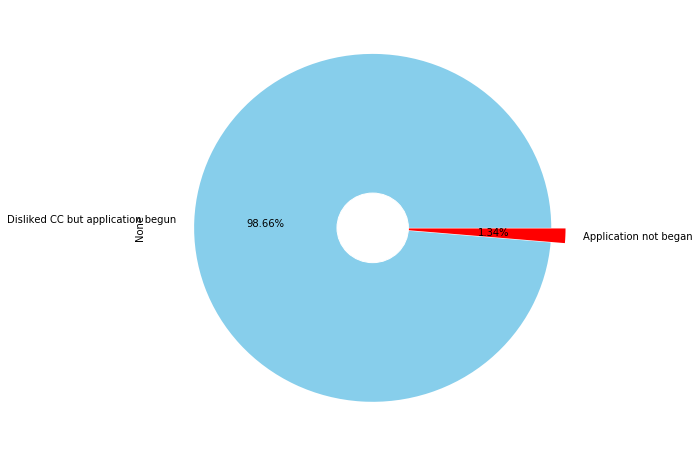

In [38]:
plt.figure(figsize=(8,8))
((df["cc_disliked"] == 1 ) & (df['cc_application_begin'] > 0)).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.08),colors= ['skyblue','red'],labels=["Disliked CC but application begun","Application not began"])
my_circle=plt.Circle( (0,0), 0.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

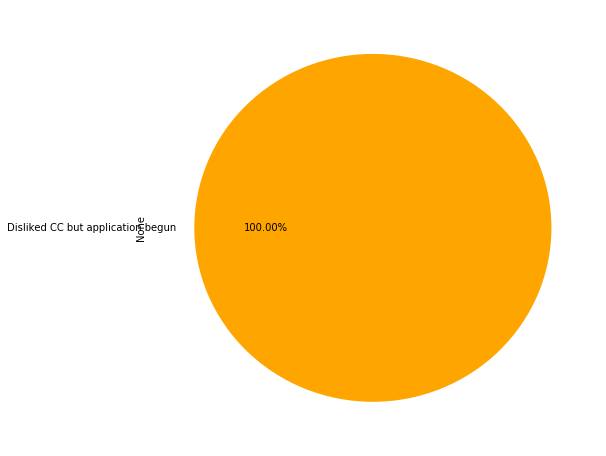

In [39]:
plt.figure(figsize=(8,8))
((df["cc_liked"] == 1 ) & (df['cc_application_begin'] == 0)).value_counts().plot(kind="pie",autopct='%1.2f%%',colors= ['orange'],labels=["Disliked CC but application begun","Application not began"])


100% peple who liked Credit card on any platform began their application for credit card

In [40]:
df[(df["waiting_4_loan"]  == 1)].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

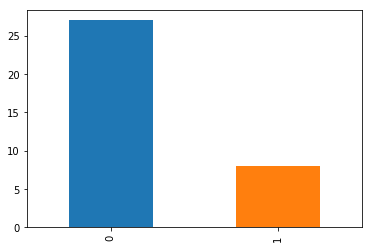

In [41]:
df[(df["waiting_4_loan"]  == 1)].churn.value_counts().plot(kind="bar")

Only 8 people who didnt get the loan churned,small amout but shows that people waiting for loan approval  can leave your services

In [42]:
df[(df["cancelled_loan"]  == 1)].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

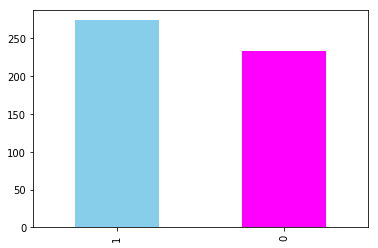

In [43]:
df[(df["cancelled_loan"]  == 1)].churn.value_counts().plot(kind="bar",color=["skyblue","magenta"])

274 people who didnt get the loan churned,which is a very small amout but must be improved

In [44]:
df[(df["received_loan"]  == 1)].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

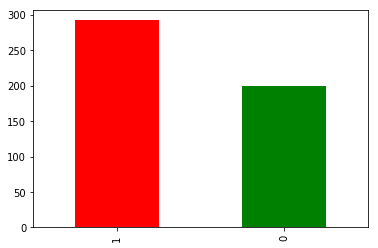

In [45]:
df[(df["received_loan"]  == 1)].churn.value_counts().plot(kind="bar",color=["red","green"])

292 people who got the loan by the company still churned. 

In [46]:
df[(df["rejected_loan"]  == 1)].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

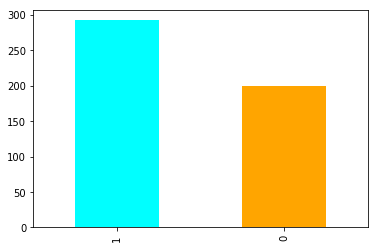

In [47]:
df[(df["received_loan"]  == 1)].churn.value_counts().plot(kind="bar",color=["cyan","orange"])

107 people got their loan rejected and churned while 25 didnt.Fairly small amount but customer can leave if they dont get loan.

In [48]:
(df["is_referred"]  == 1).value_counts()

False    18411
True      8585
Name: is_referred, dtype: int64

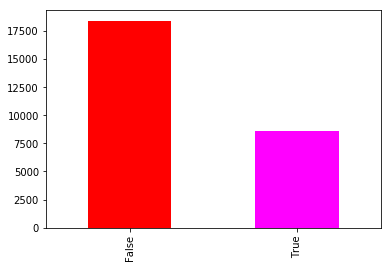

In [49]:
(df["is_referred"]  == 1).value_counts().plot(kind="bar",color=["red","magenta"])

8585 cutomer are refered customers

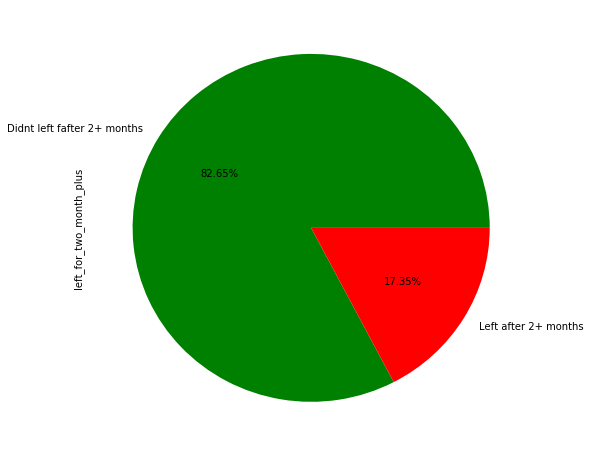

In [50]:
plt.figure(figsize=(8,8))
(df["left_for_two_month_plus"]  == 1).value_counts().plot(kind="pie",autopct='%1.2f%%'
,labels=["Didnt left fafter 2+ months","Left after 2+ months"],colors=["green","red"])

18 % people left for 2+ months

In [51]:
df[(df["left_for_two_month_plus"]  == 1)].churn.value_counts()

0    2719
1    1964
Name: churn, dtype: int64

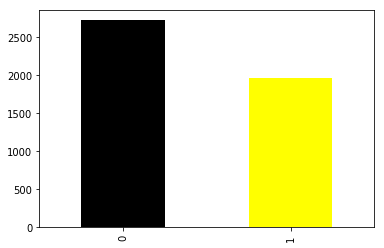

In [52]:
df[(df["left_for_two_month_plus"]  == 1)].churn.value_counts().plot(kind="bar",color=["black","yellow"])

1964 customers who left for 2 months & came back churned again

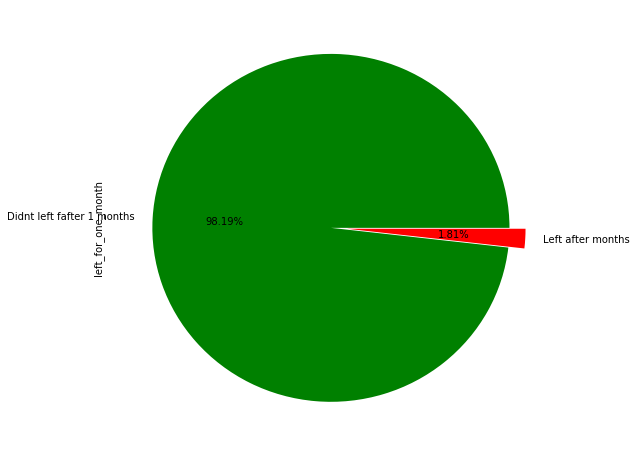

In [53]:
plt.figure(figsize=(8,8))
(df["left_for_one_month"]  == 1).value_counts().plot(kind="pie",autopct='%1.2f%%',explode=(0,0.09)
                                                     ,labels=["Didnt left fafter 1 months","Left after months"],colors=["green","red"])

2 % people left after 1 month

In [54]:
df[(df["left_for_one_month"]  == 1)].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

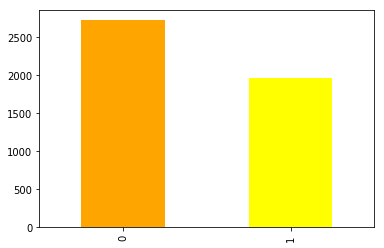

In [55]:
df[(df["left_for_two_month_plus"]  == 1)].churn.value_counts().plot(kind="bar",color=["orange","yellow"])

266 people who left for 1 month then came back and chured again

In [56]:
(df['app_downloaded'] == 1).value_counts()

True     25714
False     1282
Name: app_downloaded, dtype: int64

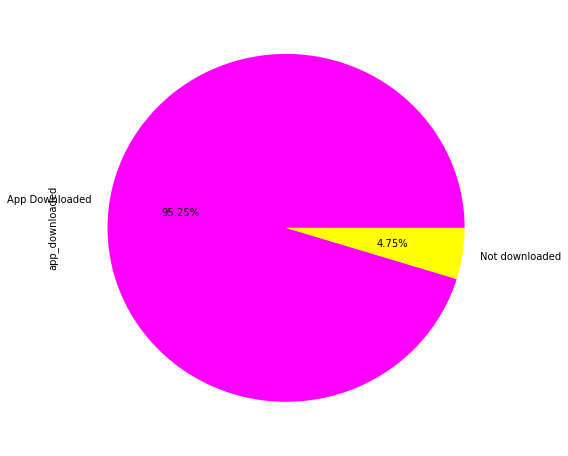

In [57]:
plt.figure(figsize=(8,8))
(df['app_downloaded'] == 1).value_counts().plot(kind="pie",autopct='%1.2f%%',colors= ['magenta','yellow'],labels=["App Downloaded","Not downloaded"])


Only 4.75% customers didnt download the app

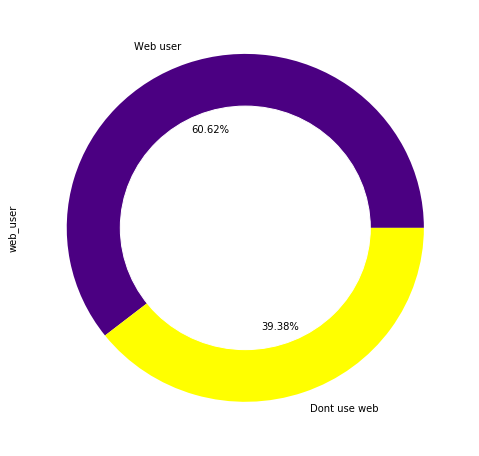

In [58]:
plt.figure(figsize=(8,8))
(df['web_user'] == 1).value_counts().plot(kind='pie',autopct='%1.2f%%',colors= ['indigo','yellow'],labels=["Web user","Dont use web"])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

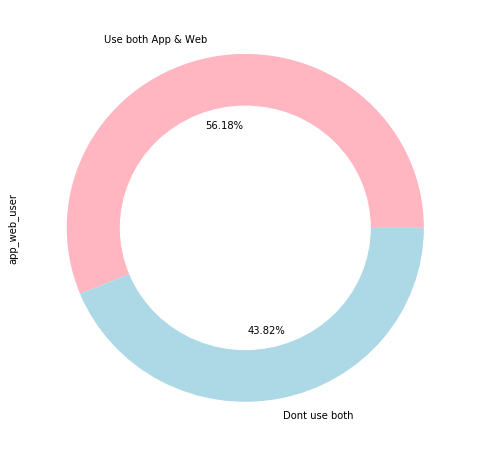

In [59]:
plt.figure(figsize=(8,8))
(df['app_web_user'] == 1).value_counts().plot(kind='pie',autopct='%1.2f%%',colors= ['lightpink','lightblue'],labels=["Use both App & Web","Dont use both"])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [60]:
(df['registered_phones']).value_counts()

0    21956
2     4048
3      754
4      183
5       55
Name: registered_phones, dtype: int64

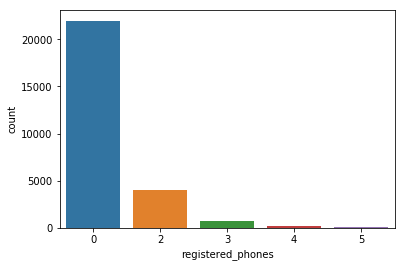

In [61]:
sns.countplot(df['registered_phones'])

Most people (21956) use 1 cell phone.  
4048 customer has 2 cell phones registered.  
754 has 3 cell registered.  
183 has 4 cell registered.  
55 customer has 5 cell registered.  
  
 5040 customers use more than 1 cell phones.These must not be targated multiple time as more resources will be consumed.

### FEATURE SELECTION

##### Now we will select columns that are essential for our model building

"User" & "Zodiac_sign" is not important in model building so we will remove these columns

In [62]:
user_id=df["user"]
df.drop(["user","zodiac_sign"],axis=1,inplace=True)

Now we will get dummy variables for all the categorical values which are represented by string values.  
"housing" & "payment_type" are two categorical varibles  that contain string values.

In [63]:
df=pd.get_dummies(df)
df.head(3)

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na
0,0,37,0,0,0,0,0,0,0,0,...,0.00,0,0,0,1,1,0,0,0,0
1,0,28,0,0,1,0,0,96,0,0,...,1.47,1,0,1,0,0,0,0,1,0
2,0,35,47,2,86,47,0,285,0,0,...,2.17,0,0,1,0,0,0,1,0,0


"housing_na","payment_type_na" dummy variable are not relevant & lead to high correlation so we will remove them.

In [64]:
df.drop(["housing_na","payment_type_na"],axis= 1,inplace= True)

In [65]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly'],
      dtype='object')

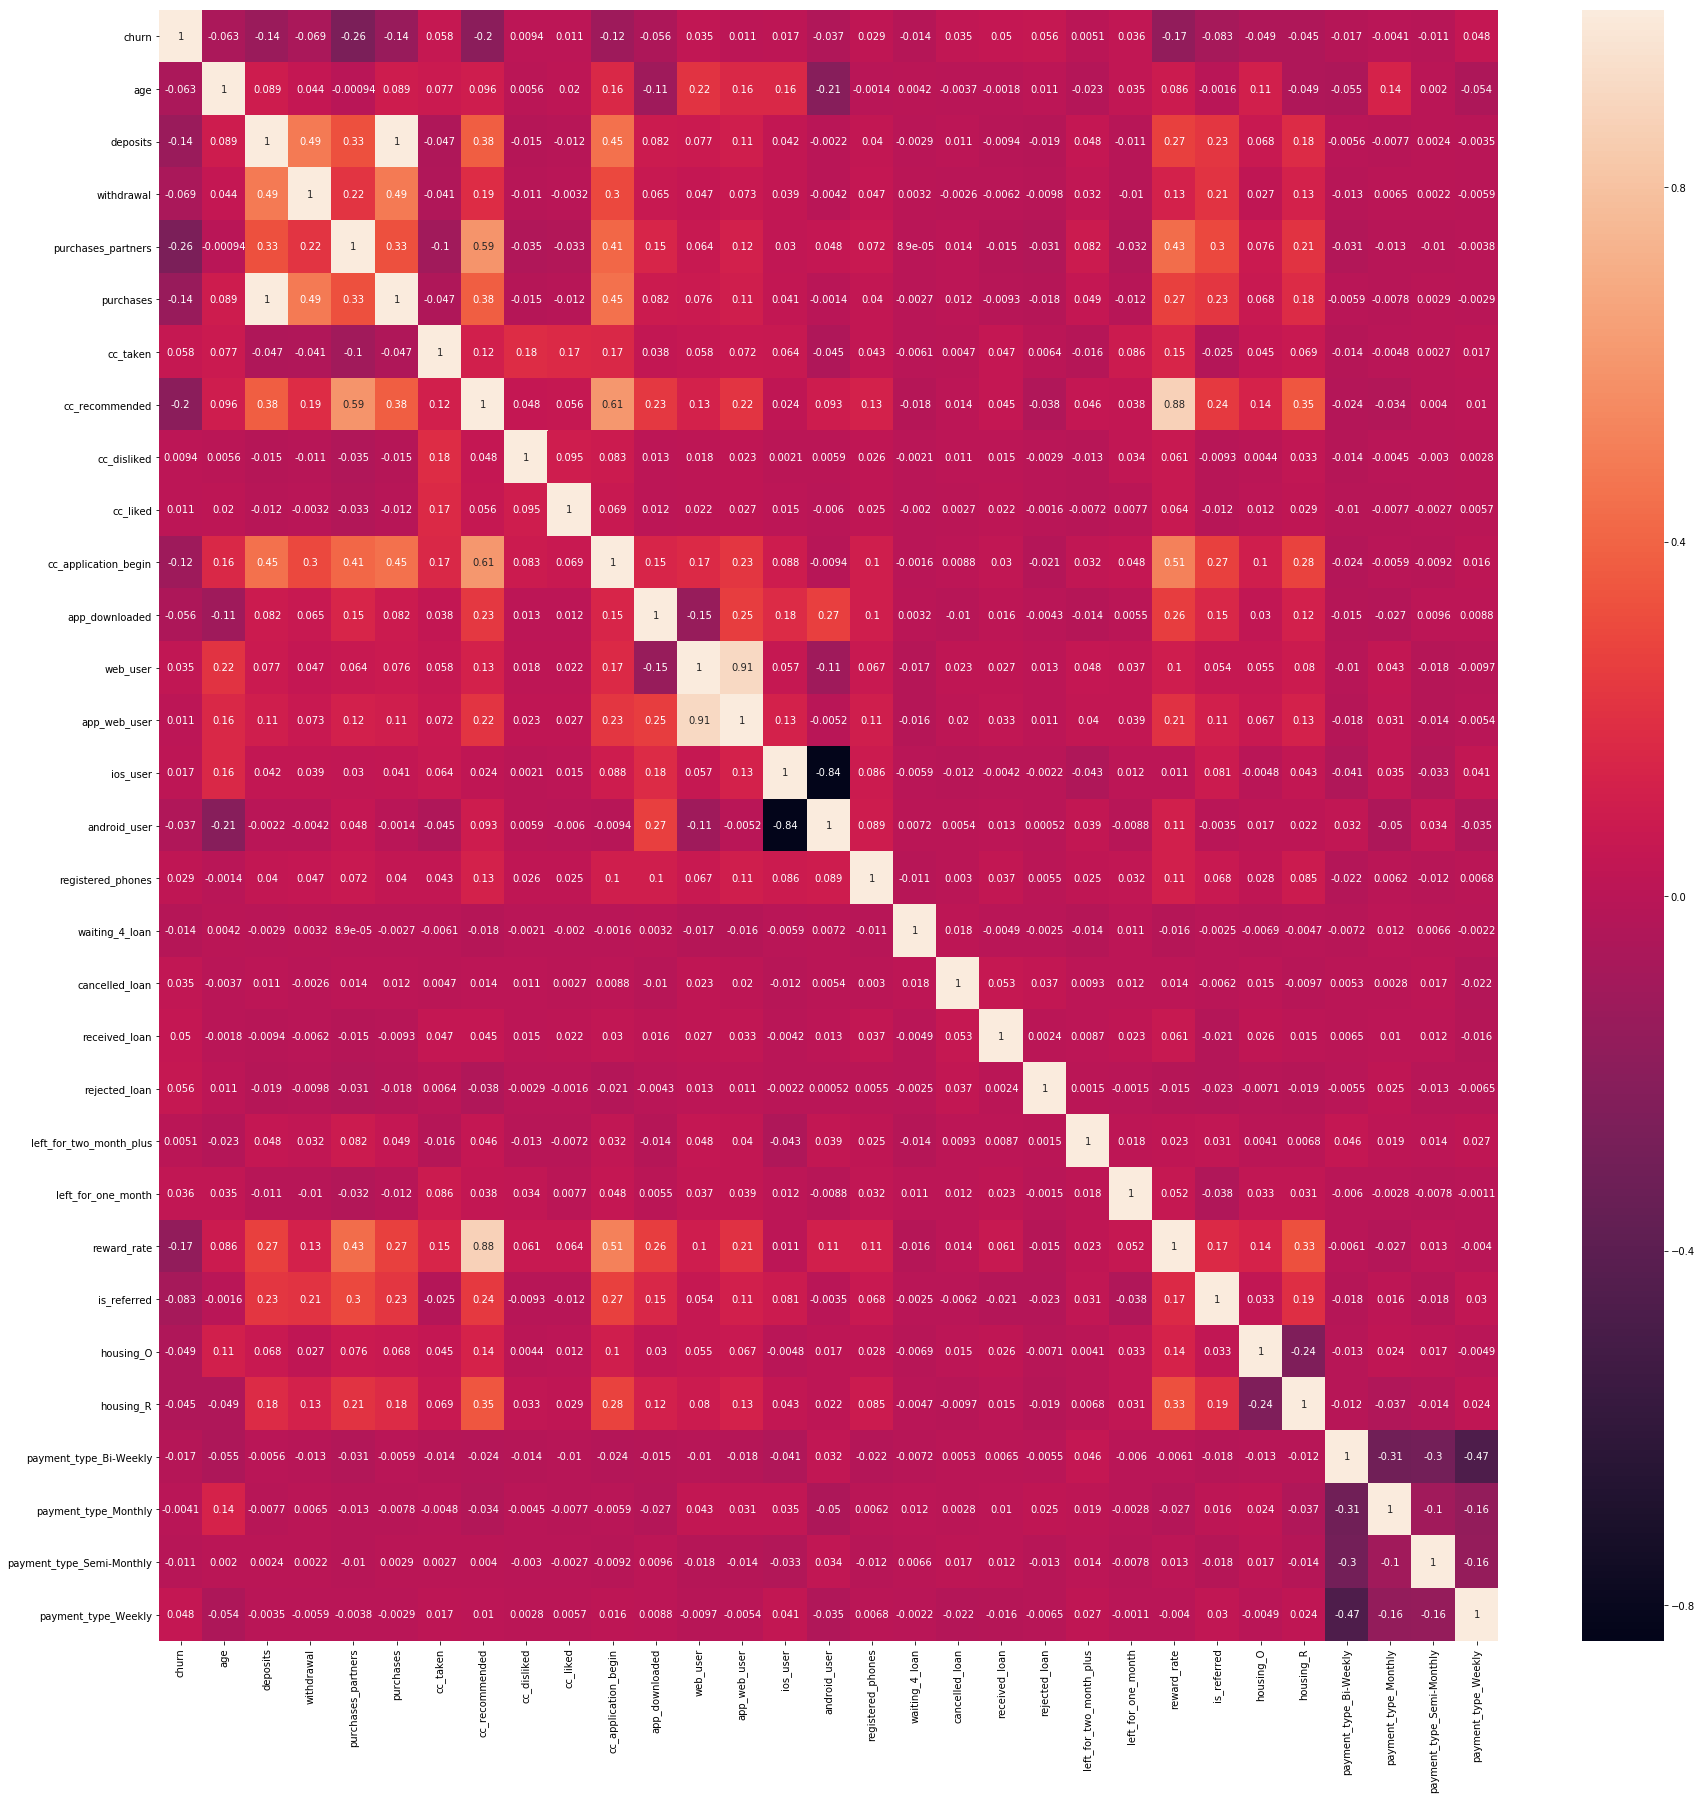

In [66]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.savefig("corr.pdf")

In correlation heatmap we can se the correlated variables.  
We can see that "app-webuser" is highy correlated with "web_user" & is a function of "app_downloaded" & web_user" since its value is 1 only when "app_downloded" & "web_user" value is 1.  
"purchases" is highly correlated with "deposits".  
"android_user" is highly negatively correlated with "ios_user" because if your are not using android phone then you are using "iphone".  
so we will remove one of these columns as this will create multicolinearity issue in our data.

In [67]:
# removing "app-web" user and "ios_user" columns as they are highly correlated with other colums
df.drop(["app_web_user","ios_user"],axis=1,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
churn                        26996 non-null int64
age                          26996 non-null int64
deposits                     26996 non-null int64
withdrawal                   26996 non-null int64
purchases_partners           26996 non-null int64
purchases                    26996 non-null int64
cc_taken                     26996 non-null int64
cc_recommended               26996 non-null int64
cc_disliked                  26996 non-null int64
cc_liked                     26996 non-null int64
cc_application_begin         26996 non-null int64
app_downloaded               26996 non-null int64
web_user                     26996 non-null int64
android_user                 26996 non-null int64
registered_phones            26996 non-null int64
waiting_4_loan               26996 non-null int64
cancelled_loan               26996 non-null int64
received_loan                26996 non-nu

In [69]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly'],
      dtype='object')

##### EXPORTING THE FINALISED DATA FOR MODEL GENRATION 

In [70]:
df.to_csv("churn_model_data.csv",index=False)

##### Importing the new dataset

In [71]:
df1=pd.read_csv("/home/ishu/Desktop/PROJECT 1 MINIMISING CHURN BY FINANCIAL HABITS/churn_model_data.csv")

Exploration of new data

In [72]:
df1.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
0,0,37,0,0,0,0,0,0,0,0,...,1,0,0.00,0,0,0,1,0,0,0
1,0,28,0,0,1,0,0,96,0,0,...,0,0,1.47,1,0,1,0,0,0,1
2,0,35,47,2,86,47,0,285,0,0,...,1,0,2.17,0,0,1,0,0,1,0
3,0,26,26,3,38,25,0,74,0,0,...,0,0,1.10,1,0,1,1,0,0,0
4,1,27,0,0,2,0,0,0,0,0,...,1,0,0.03,0,0,0,1,0,0,0


In [73]:
df1.shape

(26996, 29)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 29 columns):
churn                        26996 non-null int64
age                          26996 non-null int64
deposits                     26996 non-null int64
withdrawal                   26996 non-null int64
purchases_partners           26996 non-null int64
purchases                    26996 non-null int64
cc_taken                     26996 non-null int64
cc_recommended               26996 non-null int64
cc_disliked                  26996 non-null int64
cc_liked                     26996 non-null int64
cc_application_begin         26996 non-null int64
app_downloaded               26996 non-null int64
web_user                     26996 non-null int64
android_user                 26996 non-null int64
registered_phones            26996 non-null int64
waiting_4_loan               26996 non-null int64
cancelled_loan               26996 non-null int64
received_loan                26996 non-nu

##### Splitting Data to  Traing & Test set 

In [75]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(df1.drop(columns="churn"),df1["churn"],test_size=.20,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

##### Balancing training set

In [76]:
Y_train.value_counts()/len(Y_train) *100

0    58.603445
1    41.396555
Name: churn, dtype: float64

__We can see here that the percentage of 0 is almost 58% & for 1 is almost 41%.  
If our model predicts all values to be 0 still we will get 58% accuracy which is a problem.   
So we will perform balancing on the trainig set__

In [77]:
# first we will divie the the training data into positive and nevative values

#Y_train[Y_train.values == 1].index  ==> this give us a array of index of all 1 in Y_train
#Y_train[Y_train.values == 1].index ==> this give us a array of index of all 0 in Y_train



pos_index = Y_train[Y_train.values == 1].index # naming positive index
neg_index = Y_train[Y_train.values == 0].index # naming negative index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher , size= len(lower))
lower = np.asarray(lower)
new_indexes=np.concatenate((lower ,higher))

X_train = X_train.loc[new_indexes,]
Y_train= Y_train[new_indexes]

print(Y_train.value_counts()/len(Y_train) *100)

1    50.0
0    50.0
Name: churn, dtype: float64


After balancing values of both 0 & 1 in Y_train is 50%

##### Feature scaling

In [78]:
# feature scaing is normalising all the values of features

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(X_train))
x_test=pd.DataFrame(scaler.fit_transform(X_test))

# We converted scaler output to dataframe beacuse its output is numpy array
# In scaling we loose the column names and index (O/P is numpy array) of all the values so we need to get it back

x_train.columns= X_train.columns.values
x_test.columns= X_test.columns.values
x_train.index= X_train.index.values
x_test.index= X_test.index.values

# rewrting the names of test and traingng set 
X_train = x_train
X_test= x_test

In [79]:
X_train.head()
# we can observe all the values are now balanced and scaled

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
11695,-0.618121,-0.358142,-0.284825,-0.601825,-0.358162,-0.168601,-0.908179,-0.057557,-0.064234,-0.569398,...,-0.463151,-0.141094,-0.513920,-0.682418,-0.293268,1.206527,-0.940893,-0.332608,-0.309065,1.986469
19766,-0.417336,-0.358142,-0.284825,-0.651244,-0.358162,-0.168601,0.318904,1.013326,-0.064234,-0.569398,...,-0.463151,-0.141094,0.949677,-0.682418,-0.293268,-0.828825,1.062820,-0.332608,-0.309065,-0.503406
8354,0.285411,-0.358142,-0.284825,-0.651244,-0.358162,-0.168601,2.000463,-0.057557,-0.064234,-0.245603,...,-0.463151,-0.141094,1.388756,-0.682418,-0.293268,-0.828825,-0.940893,-0.332608,-0.309065,-0.503406
17883,0.586588,-0.358142,-0.284825,0.040626,-0.358162,-0.168601,-0.181019,-0.057557,-0.064234,-0.002757,...,-0.463151,-0.141094,-0.646974,1.465378,-0.293268,1.206527,-0.940893,-0.332608,-0.309065,1.986469
25149,-0.818906,-0.246849,-0.284825,-0.107632,-0.244492,-0.168601,-0.578685,-0.057557,-0.064234,-0.245603,...,-0.463151,-0.141094,-0.553836,1.465378,-0.293268,1.206527,-0.940893,-0.332608,-0.309065,1.986469


##### FITTING TRAINING DATA IN MODEL

In [80]:
from sklearn.linear_model import LogisticRegression
Log_Reg=LogisticRegression(random_state=0)
Log_Reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Predicting test set

In [81]:
y_pred=Log_Reg.predict(X_test)

##### Evaluating results

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

# creating confusion matrix 
cm=confusion_matrix(Y_test,y_pred)  # this is an array


print("Accuracy score is:",round(accuracy_score(Y_test,y_pred)*100,3),"%","\n")  # accuracy_score(Y_test,y_pred) 


print("Precision score is: ",round(precision_score(Y_test,y_pred)*100,3),"%","\n") # precision_score(Y_test,y_pred)

print("Recall score is : ",round(recall_score(Y_test,y_pred)*100,3),"%","\n")


print("f1 score is :",round(f1_score(Y_test,y_pred)*100,3),"%")


Accuracy score is: 61.0 % 

Precision score is:  51.95 % 

Recall score is :  76.321 % 

f1 score is : 61.82 %


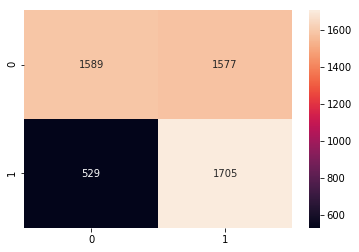

In [83]:
sns.heatmap(cm,annot=True,fmt="g")

##### K-Fold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = Log_Reg,X=X_train,y=Y_train,cv=10)

accuracies

array([0.63255034, 0.64317673, 0.651566  , 0.64317673, 0.63982103,
       0.64932886, 0.63534676, 0.64709172, 0.6442953 , 0.65548098])

In [85]:
accuracies.mean() # we can see 65 % accuracy we got is cosntant in multiple validation

0.6441834451901566

##### Analysing Coefficients

In [86]:
# this show the value of beta for each column in the train data

In [87]:
pd.concat([pd.DataFrame(X_train.columns,columns=["features"]),pd.DataFrame(np.transpose(Log_Reg.coef_),columns=["coeficients"])],axis=1)

,features,coeficients
0,age,-0.161813
1,deposits,0.270450
2,withdrawal,0.057159
3,purchases_partners,-0.727979
4,purchases,-0.408879
5,cc_taken,0.092841
6,cc_recommended,0.078889
7,cc_disliked,-0.018313
8,cc_liked,-0.008705
9,cc_application_begin,0.020992


##### Feature Selection

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [89]:
# Model to test
Log_Reg=LogisticRegression() 
rfe = RFE(Log_Reg,20)  # chooing 20 columns from the trian set
rfe = rfe.fit(X_train, Y_train)

# summerize the selection process
print(rfe.support_)  
# True resent the column that is selected

# printing the names of the 20 columns

print(X_train.columns[rfe.support_])

# we can aslo see the ranking of columns
rfe.ranking_ # all ones are the columns that are selcted (20 columns) rest are ranked according to priority 1-9

[ True  True  True  True  True  True  True False False False False  True
  True  True  True  True  True  True False  True  True False  True False
  True  True  True False]
Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly'],
      dtype='object')


array([1, 1, 1, 1, 1, 1, 1, 6, 8, 5, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 9,
       1, 7, 1, 1, 1, 4])

Accuracy score is: 60.722 % 

Precision score is:  51.719 % 

Recall score is :  76.097 % 

f1 score is : 61.583 %


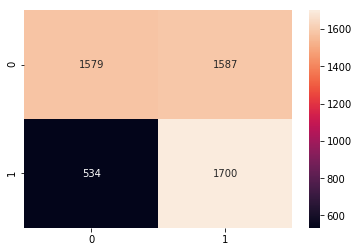

In [90]:
from sklearn.linear_model import LogisticRegression

Log_Reg=LogisticRegression(random_state=0)

Log_Reg.fit(X_train[X_train.columns[rfe.support_]],Y_train)




y_pred=Log_Reg.predict(X_test[X_test.columns[rfe.support_]])



from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score

# creating confusion matrix 
cm=confusion_matrix(Y_test,y_pred)  # this is an array


print("Accuracy score is:",round(accuracy_score(Y_test,y_pred)*100,3),"%","\n")  # accuracy_score(Y_test,y_pred) 


print("Precision score is: ",round(precision_score(Y_test,y_pred)*100,3),"%","\n") # precision_score(Y_test,y_pred)

print("Recall score is : ",round(recall_score(Y_test,y_pred)*100,3),"%","\n")


print("f1 score is :",round(f1_score(Y_test,y_pred)*100,3),"%")




sns.heatmap(cm,annot=True,fmt="g")

__Even after using RFE we have same accuracy,precision,recall,f1 score.
Here we can conclude that we have found 20 columns that have no power to predict user churn.__


##### Analysing coeficients after RFE

In [91]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=["features"]),pd.DataFrame(np.transpose(Log_Reg.coef_),columns=["coeficients"])],axis=1)

,features,coeficients
0,age,-0.165247
1,deposits,0.265066
2,withdrawal,0.062189
3,purchases_partners,-0.719019
4,purchases,-0.395632
5,cc_taken,0.092454
6,cc_recommended,0.092772
7,web_user,0.133761
8,android_user,-0.051400
9,registered_phones,0.124999


__The coefficients havent changed much__

##### Putting all results together

In [92]:
final_results = pd.concat([Y_test, user_id], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0


Here we can conclude that we have built a model that can predict with 61% accuracy.